Question 1:

In [1]:
import pandas as pd

data=pd.read_csv("transaction_anomalies_dataset.csv")

null_values=data.isnull().sum()
print("Null values in each column:\n",null_values)

print("\nColumn information:")
print(data.info())

print("\nDescriptive statistics of the data:")
print(data.describe())


Null values in each column:
 Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transact

Question 2:

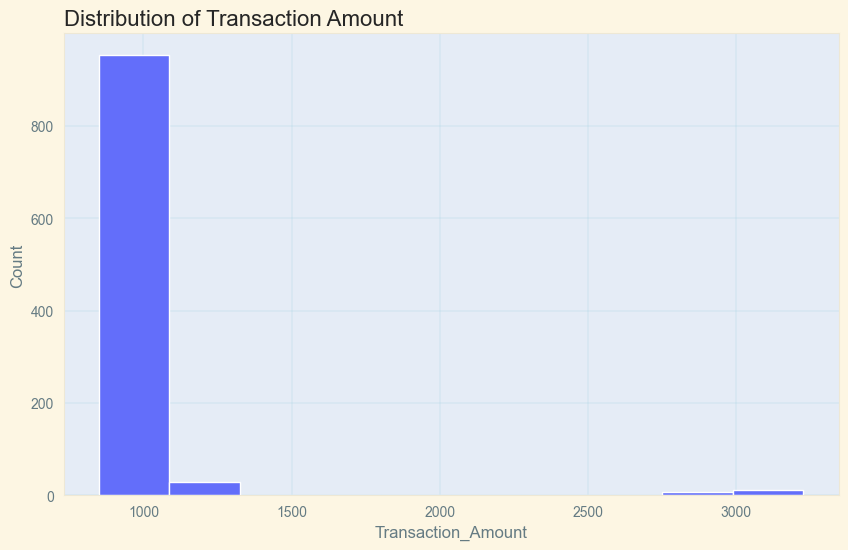

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("transaction_anomalies_dataset.csv")


plt.figure(figsize=(10,6))
plt.style.use("Solarize_Light2")
plt.hist(data['Transaction_Amount'], color='#636efa')
plt.title('Distribution of Transaction Amount', loc='left')
plt.xlabel('Transaction_Amount')
plt.ylabel('Count')
plt.grid(True, color='lightblue', linewidth=0.3)
plt.gca().set_facecolor('#e5ecf6')
plt.show()

Question 3:

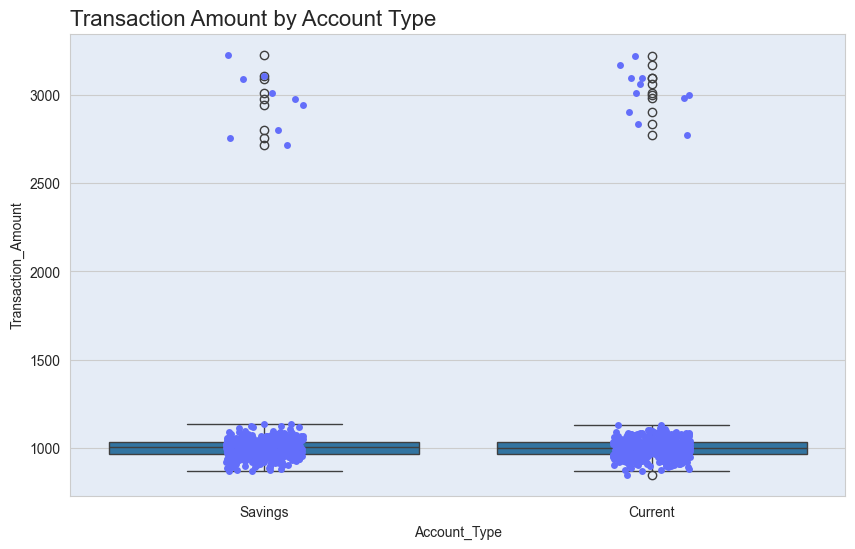

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("transaction_anomalies_dataset.csv")

sns.set_style("whitegrid") 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)
sns.stripplot(x='Account_Type', y='Transaction_Amount', data=df, jitter=True, marker='o', color='#636efa')

plt.style.use("Solarize_Light2")
plt.title('Transaction Amount by Account Type', loc='left')
plt.xlabel('Account_Type')
plt.ylabel('Transaction_Amount')
plt.gca().set_facecolor('#e5ecf6')
plt.show()

Question 4:

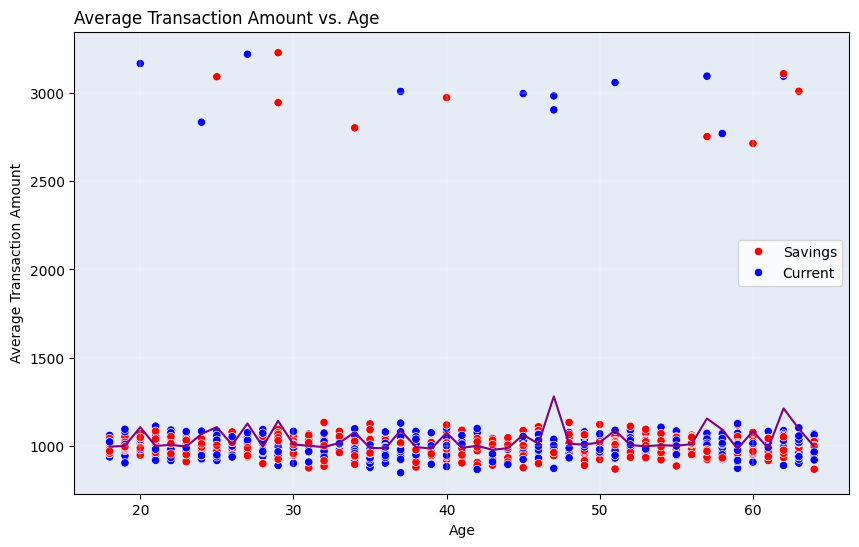

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('transaction_anomalies_dataset.csv')

average_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Transaction_Amount', hue='Account_Type', palette=['red', 'blue'])
sns.lineplot(data=average_transaction_by_age, x='Age', y='Transaction_Amount', color='purple')
plt.title('Average Transaction Amount vs. Age', loc='left')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.gca().set_facecolor('#e5ecf6')



plt.grid(True, color='white', linewidth=0.3)
plt.show()


Question 5:

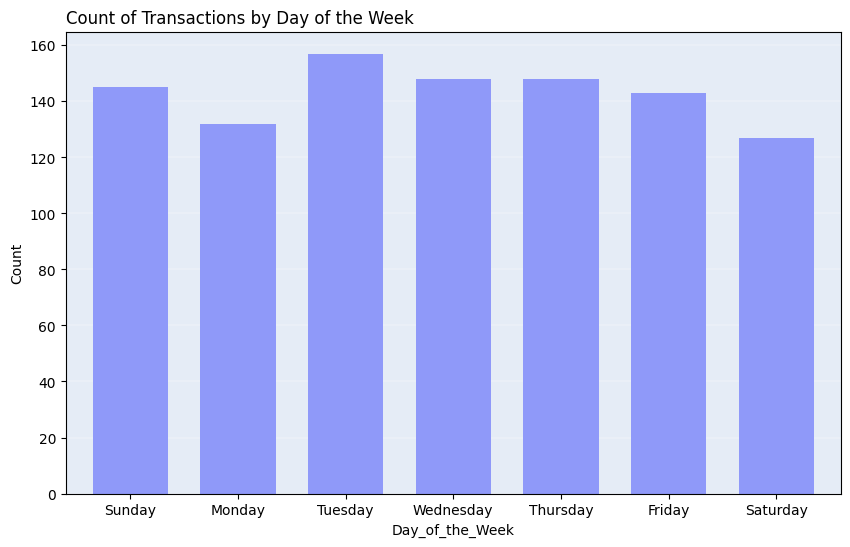

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("transaction_anomalies_dataset.csv")

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

transactions_by_day = data['Day_of_Week'].value_counts().reindex(days_order)

plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar', color='#8f99f9', width=0.7, zorder=2)

plt.title('Count of Transactions by Day of the Week', loc='left')
plt.xlabel('Day_of_the_Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', color='white', linewidth=0.3, zorder=1)
plt.gca().set_facecolor('#e5ecf6')
plt.show()


Question 6:

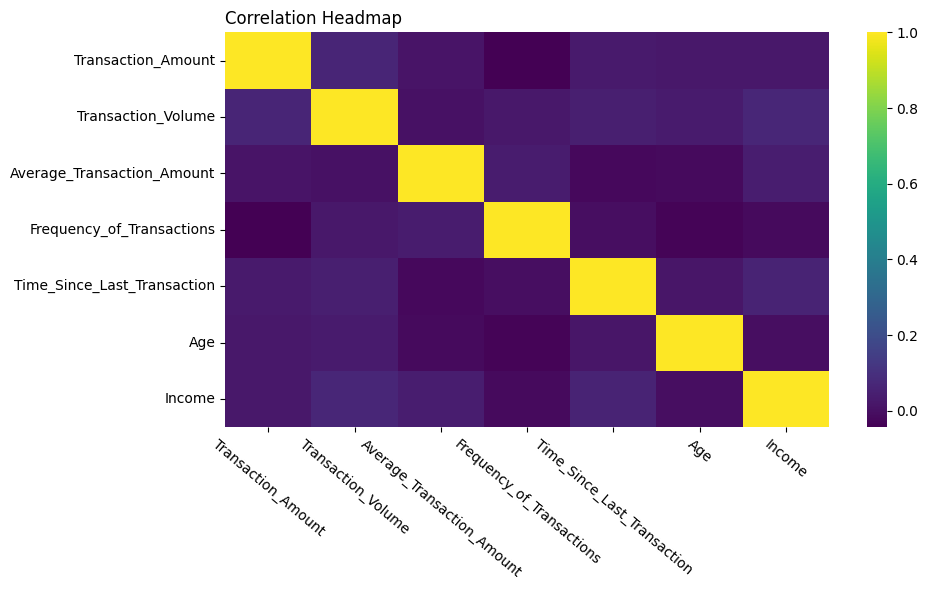

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("transaction_anomalies_dataset.csv")

numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, cmap='viridis', fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Headmap', loc='left')
plt.xticks(rotation=320)
plt.tight_layout()
plt.show()


In [ ]:
Question 7:

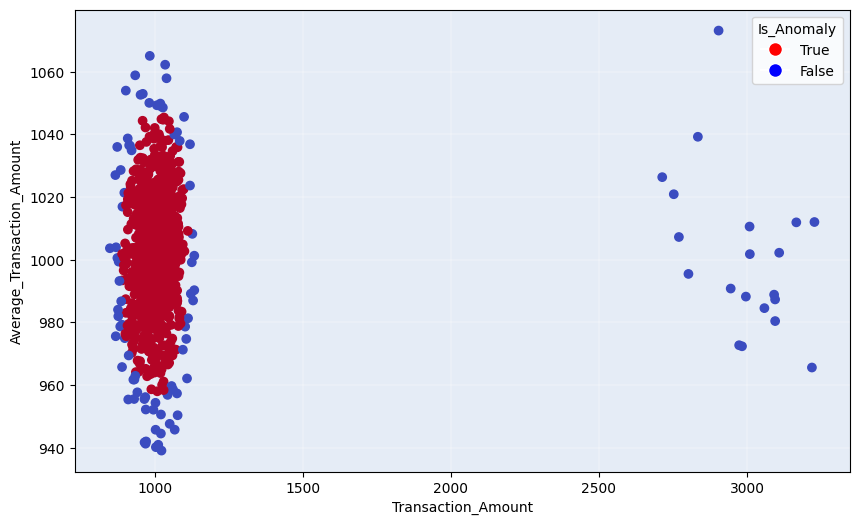

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from matplotlib.lines import Line2D

data = pd.read_csv("transaction_anomalies_dataset.csv")

features = ['Transaction_Amount', 'Average_Transaction_Amount']

model = IsolationForest(contamination=0.1)
model.fit(data[features])

data['Is_Anomaly'] = model.predict(data[features])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Transaction_Amount'], data['Average_Transaction_Amount'], c=data['Is_Anomaly'], cmap='coolwarm', zorder=2)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='True'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='False')]
plt.legend(handles=legend_elements, title='Is_Anomaly', loc='upper right')

plt.xlabel('Transaction_Amount')
plt.ylabel('Average_Transaction_Amount')
plt.gca().set_facecolor('#e5ecf6')
plt.grid(True, color='white', linewidth=0.3, zorder=1)
plt.show()


Question 8:

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data = pd.read_csv("transaction_anomalies_dataset.csv")

features = ['Transaction_Amount', 'Average_Transaction_Amount']

model = IsolationForest(contamination=0.1)
model.fit(data[features])

data['Is_Anomaly'] = model.predict(data[features])

num_anomalies = (data['Is_Anomaly'] == -1).sum()

total_data_points = data.shape[0]

anomaly_ratio = num_anomalies / total_data_points

print("Number of anomalies:", num_anomalies)
print("Total data points:", total_data_points)
print("Ratio of anomalies:", anomaly_ratio)


Number of anomalies: 100
Total data points: 1000
Ratio of anomalies: 0.1


Question 9:
Question 10:
Question 11:

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

data = pd.read_csv("transaction_anomalies_dataset.csv")


features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

model = IsolationForest(contamination=0.1)
model.fit(data[features])

predictions = model.predict(data[features])
#1 for Normal, and 0 for anomaly

binary_predictions = [1 if pred == 1 else 0 for pred in predictions]

data['Is_Anomaly'] = binary_predictions

print(data)

#Question 10

print("\nClassification Report:")

report = classification_report(data['Is_Anomaly'], binary_predictions)

print(report)

#Question 11
print('\n')
input_values={
    'Transaction_Amount':10000,
    'Average_Transaction_Amount':900,
    'Frequency+of_Transactions':6,
    'Age':30,
    'Income':50000,
    'Time_Since_Last_transaction':10,
    'Transaction_Volume':20,
}



input_data=pd.DataFrame([input_values])

prediction=model.predict(input_data.values.reshape(1,-1))

if prediction[0]==-1:
    print('Anomaly detected: This transaction is flagged as anomaly.')
else:
    print('No anomaly detected: This transaction is not flagged as an anomaly.')

    Transaction_ID  Transaction_Amount  Transaction_Volume  \
0              TX0         1024.835708                   3   
1              TX1         1013.952065                   4   
2              TX2          970.956093                   1   
3              TX3         1040.822254                   2   
4              TX4          998.777241                   1   
..             ...                 ...                 ...   
995          TX995          901.138758                   3   
996          TX996          928.962516                   4   
997          TX997          950.921600                   2   
998          TX998          933.291962                   4   
999          TX999          968.289340                   3   

     Average_Transaction_Amount  Frequency_of_Transactions  \
0                    997.234714                         12   
1                   1020.210306                          7   
2                    989.496604                          5   
3      

C:\Users\khati\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
